## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [3]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [4]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
#data[0:100]

784594


In [5]:
#str.split(str="", num=string.count(str)).
data2=data.split()

In [6]:
cont=1
data3 = []
while cont <= len(data2):
        data3.append(data2[cont])
        cont=cont+2 

## 將 txt 轉成 pandas dataframe

In [7]:
import pandas as pd
    
df3 = pd.DataFrame(data3)
df3.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [8]:
df3[0:4]

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...


In [12]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = 'https://files.bountyhunter.co/contest/public/201702/9eff881c-f672-45a8-98d3-ad23bf4241e6.png'

In [14]:
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

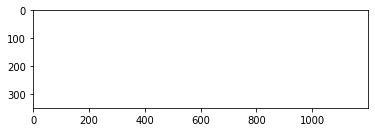

In [15]:
# Convert img to numpy array
plt.imshow(img)
plt.show()

In [150]:
def img2arr_fromURLs(url_list, resize = False):
    from PIL import Image
    from io import BytesIO
    import numpy as np
    import matplotlib.pyplot as plt
    cont=0
    
    while cont < len(url_list):
        cont=cont+1 
        try:
            first_link=url_list[0][cont]
            response = requests.get(first_link)
            img_list = Image.open(BytesIO(response.content))
            plt.imshow(img_list)
            plt.show()
        except OSError:
            print('Error: 没有找到照片')
        else:
            print ('照片抓取成功')
                   
    return img_list

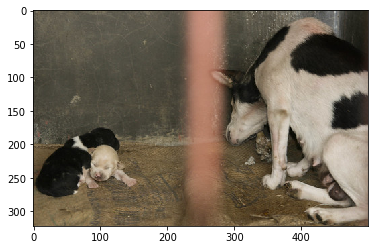

照片抓取成功


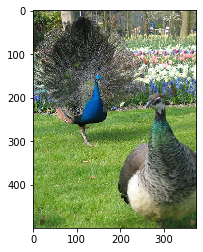

照片抓取成功


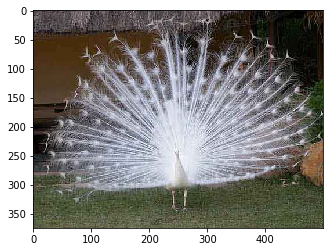

照片抓取成功
Error: 没有找到照片


KeyError: 5

In [151]:
result = img2arr_fromURLs(data3[0:9])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()